## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [0]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

In [8]:
# Create the dataset using the np.array() with the data provided above
# Store the number of users for further usages.
# Store the number of movies for further usages.

X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

numUsers, numMovies = X.shape

print("Number of Users:",numUsers)
print("Number of Movies:",numMovies)

Number of Users: 7
Number of Movies: 5


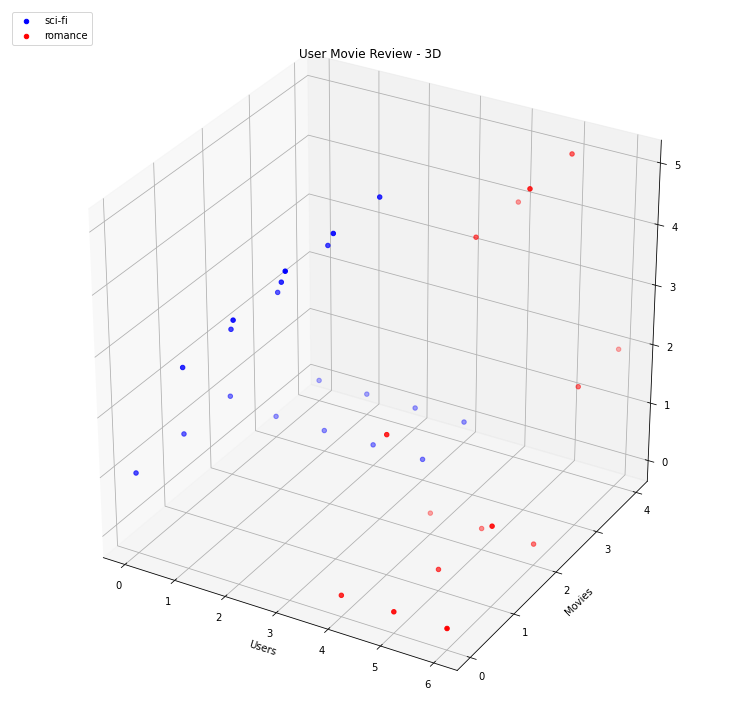

In [9]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.

movieArray = np.array([[i for i in range(numMovies)] for j in range(numUsers)])
movieArray = movieArray.flatten()

userArray = np.array([[j for i in range(numMovies)] for j in range(numUsers)])
userArray = userArray.flatten()

reviewArray = X.flatten()

# 2. Set the figure size to (13,13) by using the function plt.figure().

figure = plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.

subPlot = figure.add_subplot(1, 1, 1, projection='3d')

# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.

plt.rcParams.update({'legend.fontsize':10})

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.

subPlot.scatter(userArray[:20], movieArray[:20], reviewArray[:20], color='b', label='sci-fi')

# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.

subPlot.scatter(userArray[20:], movieArray[20:], reviewArray[20:], color='r', label='romance')

# 7. Set the legend to a proper position using ax.legend(loc=?)

subPlot.legend(loc="upper left")

# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)

plt.xlabel('Users')
plt.ylabel('Movies')

# 9. Set the title of this fig using plt.title()

plt.title("User Movie Review - 3D")

# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()

plt.xticks([i for i in range(numUsers)])
plt.yticks([i for i in range(numMovies)])

# 11. plot and present the fig using plt.show()

plt.show()


In [0]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
# 2. Subtract the mean from the data set
# 3. Store the new centered data set

XMean = np.mean(X, axis = 0)
xCentred = X - XMean

## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [0]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values

u, s, vT = np.linalg.svd(xCentred)

In [12]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691 -0.158 -0.703 -0.027  0.025  0.042]
 [ 0.265 -0.142 -0.077  0.196 -0.053  0.929 -0.023]
 [ 0.39   0.133 -0.036 -0.054 -0.453 -0.089  0.783]
 [ 0.516  0.408  0.004 -0.414  0.628  0.039  0.012]
 [-0.388  0.286  0.686 -0.421 -0.169  0.292  0.083]
 [-0.546  0.347 -0.662 -0.185  0.088  0.204  0.244]
 [-0.25  -0.34   0.244  0.286  0.601  0.027  0.564]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [-0.389  0.831 -0.389 -0.061 -0.061]
 [ 0.707 -0.    -0.707 -0.    -0.   ]
 [ 0.     0.    -0.    -0.707  0.707]]



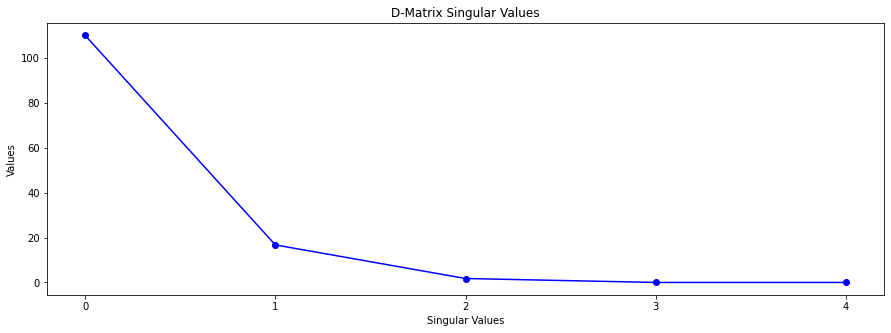

In [13]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s

DMatrix = s*s

# 2. Set the fig size to (15,5)

plt.figure(figsize=(15,5))

# 3. Add the line chart using plt.plot( ?? ,'bo-')

plt.plot(DMatrix, 'bo-')

# 3. Add proper tital, ticks, axis labels

plt.title('D-Matrix Singular Values')
plt.xlabel('Singular Values')
plt.ylabel('Values')

plt.xticks([i for i in range(len(DMatrix))])

plt.show()

In [14]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
# 2. Obtain the first k of v^T and store it

vT_K = vT[:2].T

# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T

xPCA = np.matmul(xCentred,vT_K)

# 4. Print the compressed value of X

print("Compressed Value of X:\n", xPCA)


Compressed Value of X:
 [[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


Let's visualize what just happened.

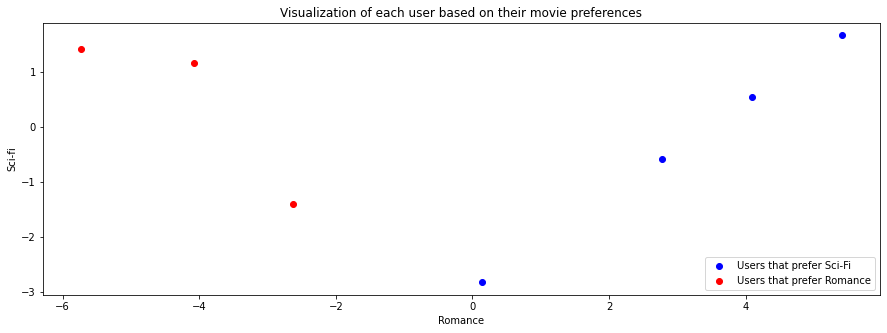

In [15]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)

plt.figure(figsize=(15, 5))

# 2. Create propor title, axis and legend

plt.scatter(xPCA[:4,0], xPCA[:4,1], color='b', label='Users that prefer Sci-Fi')
plt.scatter(xPCA[4:,0], xPCA[4:,1], color='r', label='Users that prefer Romance')

plt.xlabel('Romance')
plt.ylabel('Sci-fi')

plt.title('Visualization of each user based on their movie preferences')

plt.legend(loc="lower right")

# 3. Plot the data

plt.show()

## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [0]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.

XTX = np.matmul(xCentred.T,xCentred)

# 2. Apply np.linalg.eig() to clculate the eigen vectors and values

eigValues, eigVectors = np.linalg.eig(XTX)


In [17]:
print("V (Eigen-vectors) = ")
print(np.around(eigVectors, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigValues, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigValues)), decimals=3))

V (Eigen-vectors) = 
[[ 0.471  0.356 -0.707  0.389  0.005]
 [ 0.374  0.412 -0.    -0.831  0.   ]
 [ 0.471  0.356  0.707  0.389 -0.005]
 [-0.456  0.537  0.     0.061 -0.707]
 [-0.456  0.537  0.     0.061  0.707]]

diagonal elements of D (Eigen-values) = 
[110.093  16.726   0.      1.753   0.   ]

sqrt(Eigen-values) = 
[10.492  4.09   0.     1.324  0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [0]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people

In [19]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70

peopleData = fetch_lfw_people(min_faces_per_person = 70)

# 2. Store the number of images and its hight, width using lfw_people.images.shape

numImages, heightImages, widthImages = peopleData.images.shape

# 3. Calculate number of pixels

numPixels = heightImages*widthImages

# 4. Store the pixel values using lfw_people.data

pixelVals = peopleData.data

print("Number of Images:", numImages)
print("Height of Images:", heightImages)
print("Width of Images:", widthImages)
print("Number of Pixels:", numPixels)
print("Pixel Values:", pixelVals)

Number of Images: 1288
Height of Images: 62
Width of Images: 47
Number of Pixels: 2914
Pixel Values: [[253.66667  254.33333  253.66667  ...  87.        88.        86.666664]
 [ 38.333332  43.        53.       ... 114.666664 116.666664 143.66667 ]
 [ 88.        92.666664 112.666664 ... 182.66667  183.66667  182.66667 ]
 ...
 [ 86.333336  83.333336  76.333336 ...  48.        49.        40.666668]
 [ 49.333332  55.666668  76.666664 ... 186.33333  176.33333  161.      ]
 [ 31.        26.333334  28.       ...  34.        42.        69.666664]]


In [0]:
def plt_face(x):
    global heightImages,widthImages
    plt.imshow(x.reshape((heightImages, widthImages)), cmap=plt.cm.gray)
    plt.xticks([])

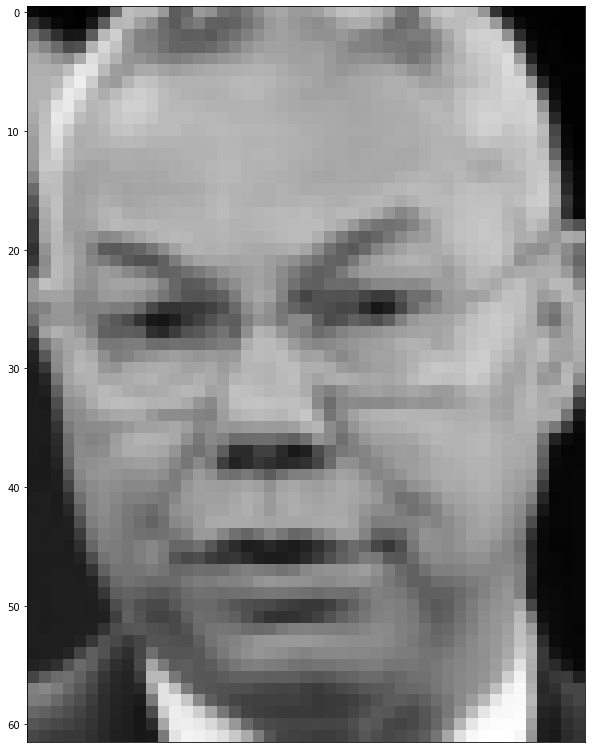

In [21]:

# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)

figure = plt.figure(figsize=(10,20))

# 2. Use plt_face()

plt_face(pixelVals[3])

# 3. plt.show()

plt.show()

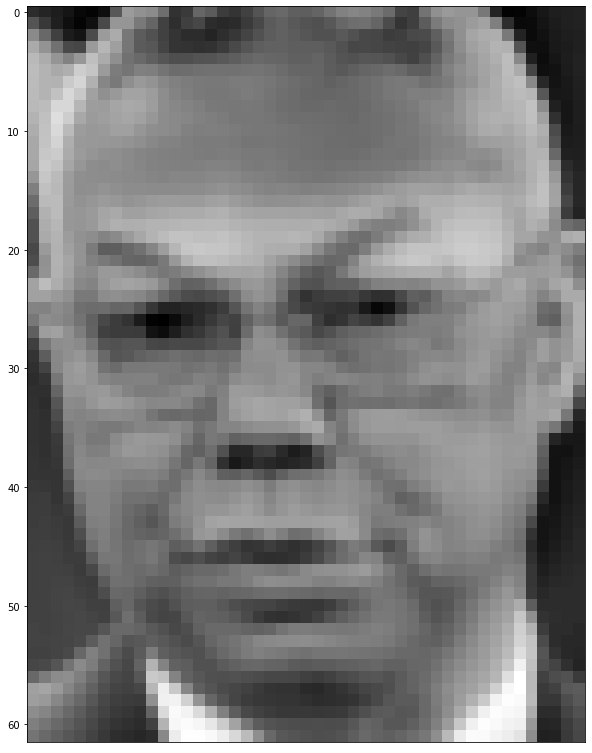

In [22]:
# Find the Mean picture:
# 1. Calculate the mean of the image data

pixelValsMean = np.mean(pixelVals, axis = 0)

# 2. Remove the mean from all the image

pixelValsCentred = pixelVals - pixelValsMean

# 3. plot the face use plt_face()

figure = plt.figure(figsize=(10,20))

plt_face(pixelValsCentred[3])


In [0]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data

covarMatrix = np.matmul(pixelValsCentred.T,pixelValsCentred)

# 2. Use the np.linalg.eig() to compute eig value and eig vectors

eigVal, eigVec = np.linalg.eig(covarMatrix)

# 3. Find the top5 features
# 4. Calculate the new value based on the top5 feature.
# 5. Store the new value.

top5 = [0,1,2,3,4]

eigVal = eigVal[:5]
eigVec = eigVec.T[:5].T

xPCA = np.matmul(pixelValsCentred[3], eigVec)


In [31]:
print("Top 5 Vector:")
print(eigVec.real.tolist())
print()
print("Top 5 EigVal:")
print()
print(eigVal.real)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5)
print()
print(pixelValsCentred[3][top5])
print()

Top 5 Vector:
[[0.005373429507017136, 0.017459912225604057, 0.017839690670371056, 0.033519238233566284, -0.013145295903086662], [0.005695135332643986, 0.016475625336170197, 0.016025438904762268, 0.035288382321596146, -0.013579614460468292], [0.0061380332335829735, 0.016284329816699028, 0.014887979254126549, 0.03671131283044815, -0.014037939719855785], [0.007016506511718035, 0.018298977985978127, 0.014003134332597256, 0.03776909410953522, -0.014300554059445858], [0.007956034503877163, 0.02073809690773487, 0.01348405983299017, 0.03860314562916756, -0.013201899826526642], [0.008488570339977741, 0.021615033969283104, 0.012607130222022533, 0.04059004411101341, -0.012631905265152454], [0.009634106419980526, 0.020977046340703964, 0.011157396249473095, 0.0419529490172863, -0.011973067186772823], [0.010693605057895184, 0.01986547000706196, 0.008351590484380722, 0.04216865822672844, -0.010956288315355778], [0.011063646525144577, 0.018815146759152412, 0.004867773503065109, 0.04191944748163223, -0

In [25]:
# project back to the image space where d=5
# X’= X_pca * VT  + X_mean 

xProjection = np.matmul(xPCA, eigVec.T) + pixelValsMean
print(xProjection)

[ 80.327324  84.49615   91.05394  ... 105.85437  101.303696  96.072395]


The projection of the fourth image:



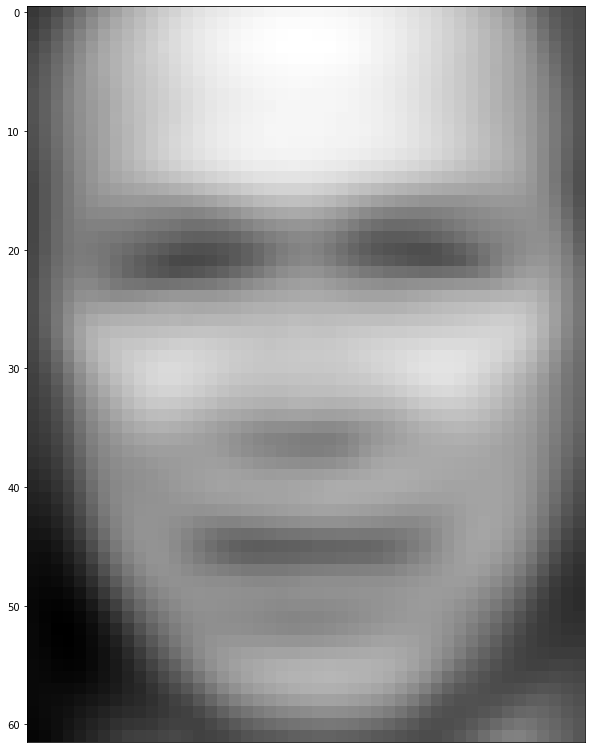

In [26]:
print("The projection of the fourth image:\n")

figure = plt.figure(figsize=(10,20))
plt_face(xProjection)


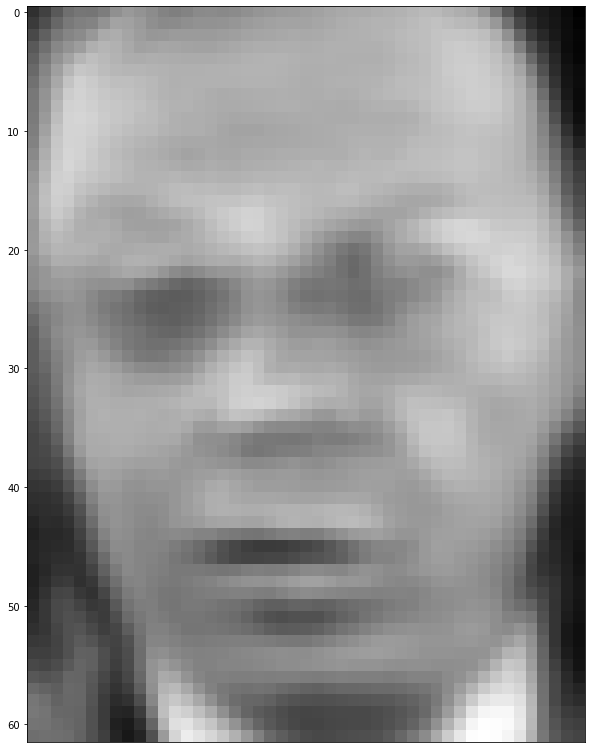

In [27]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
# 4. compute the newfeature using top50 eig vec and eig val.
# 5. plot the feace

top50 = [i for i in range(50)]

covarMatrix = np.matmul(pixelValsCentred.T,pixelValsCentred)

eigVal, eigVec = np.linalg.eig(covarMatrix)

eigVal = eigVal[:50]
eigVec = eigVec.T[:50].T

xPCA = np.matmul(pixelValsCentred[3], eigVec)

xProjection = np.matmul(xPCA, eigVec.T) + pixelValsMean

figure = plt.figure(figsize=(10,20))
plt_face(xProjection)



